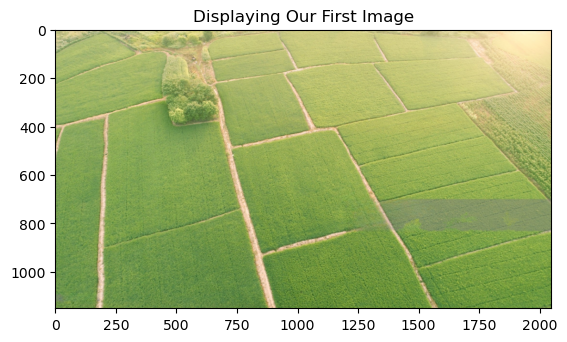

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread('C:/Users/Emelin/Desktop/images/AerialView.jpeg')

def imshow(title = "", image = None):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

imshow("Displaying Our First Image", image)

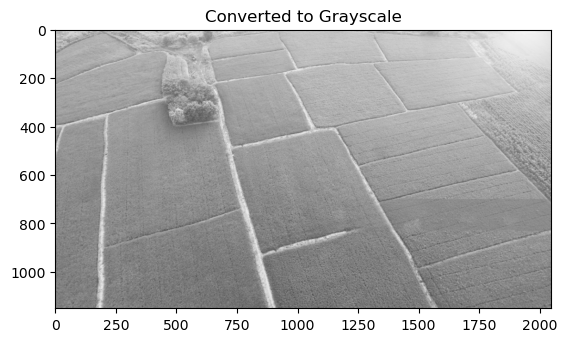

In [3]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

imshow("Converted to Grayscale", gray_image)

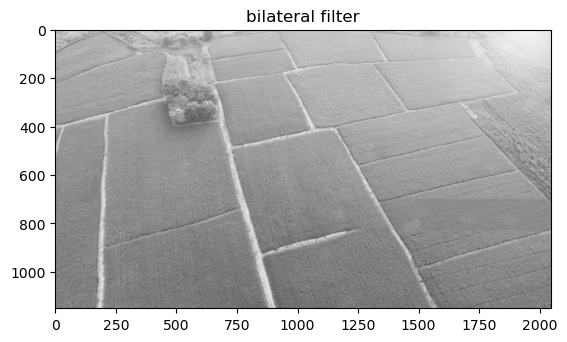

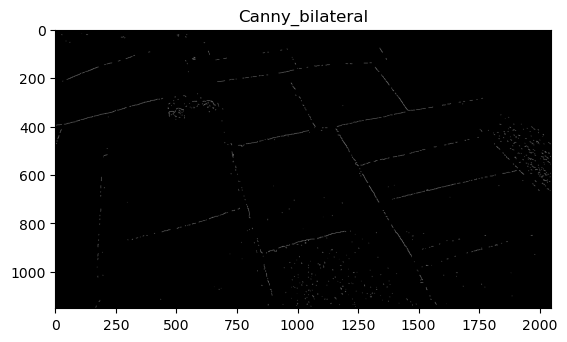

In [53]:
bilateral_filter = cv2.bilateralFilter(gray_image, 5, 45, 45)
imshow("bilateral filter", bilateral_filter)

sobelx = cv2.Sobel(src=bilateral_filter, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=1)
sobely = cv2.Sobel(src=bilateral_filter, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=1)
sobelxy = cv2.Sobel(src=bilateral_filter, ddepth=cv2.CV_32F, dx=1, dy=1, ksize=1)

# Canny Edge Detection
edges = cv2.Canny(image=gray_image, threshold1=200, threshold2=255)
imshow('Canny_bilateral', edges)

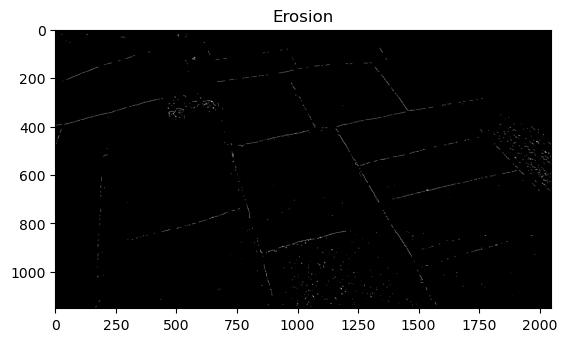

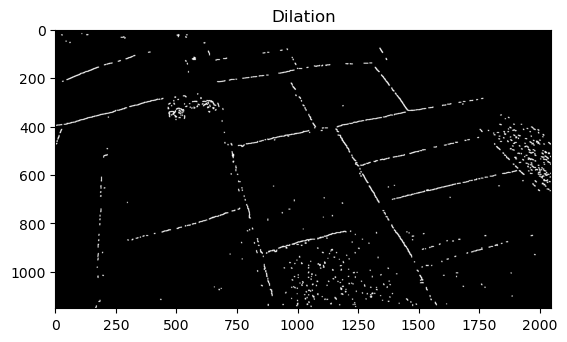

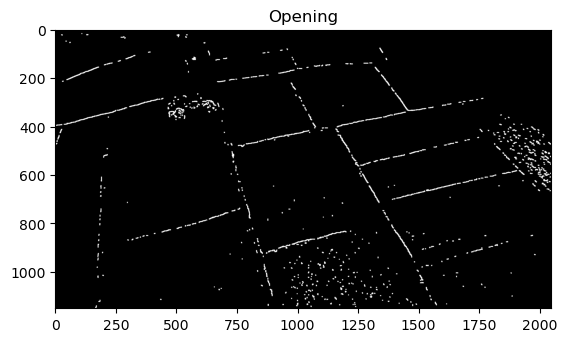

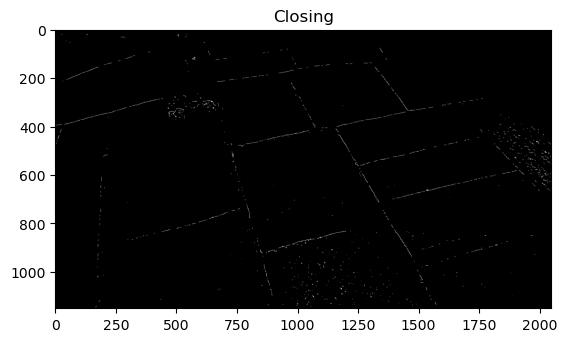

In [63]:
# Let's define our kernel size
kernel = np.ones((3,3), np.uint8)

# Now we erode
erosion = cv2.erode(dilation, kernel, iterations = 1)
imshow('Erosion', erosion)

# Dilate here
dilation = cv2.dilate(closing, kernel, iterations = 1)
imshow('Dilation', dilation)

# Opening - Good for removing noise
opening = cv2.morphologyEx(dilation, cv2.MORPH_OPEN, kernel)
imshow('Opening',opening)

# Closing - Good for removing noise
kernel_close= np.ones((6,6), np.uint8)
closing = cv2.morphologyEx(erosion, cv2.MORPH_CLOSE, kernel)
imshow('Closing',closing)

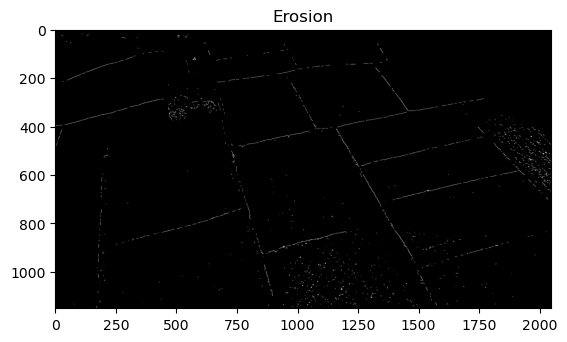

In [34]:
kernel = np.ones((2,2), np.uint8)
# Now we erode
erosion = cv2.erode(opening, kernel, iterations = 1)
imshow('Erosion', erosion)

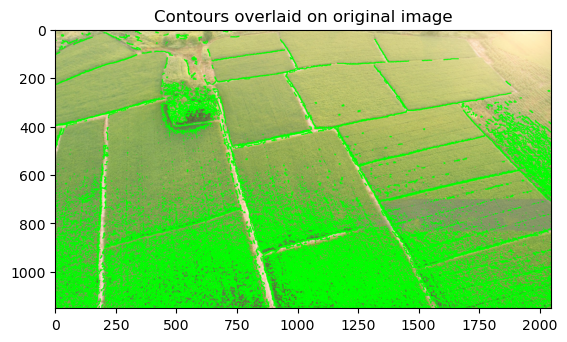

In [65]:
# Finding Contours
# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours, hierarchy = cv2.findContours(erosion, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# Draw all contours, note this overwrites the input image (inplace operation)
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0,255,0), thickness = 2)
imshow('Contours overlaid on original image', image)

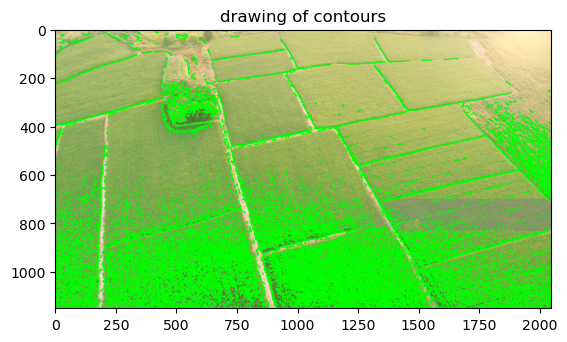

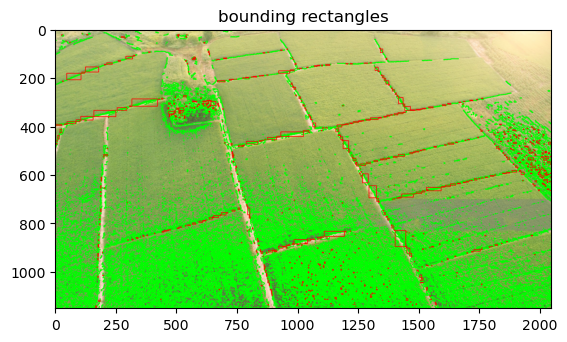

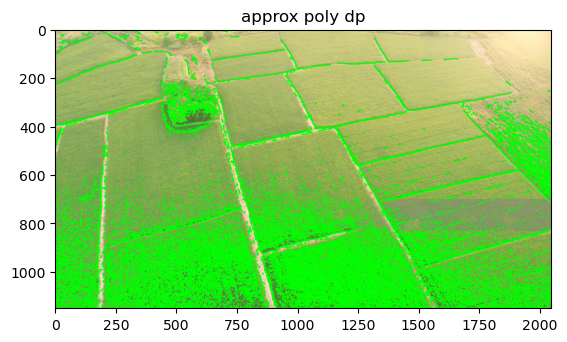

In [68]:
orig_image= image.copy()
#ret, thresh= cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY_INV)

contours, hierarchy= cv2.findContours(edges.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
copy = image.copy()

for c in contours:
    x,y,w,h= cv2.boundingRect(c)
    cv2.rectangle(orig_image,(x,y), (x+w,y+h), (0,0,255), 2)
    cv2.drawContours(image, [c],0,(0,255,0),2)

imshow('drawing of contours', image)
imshow('bounding rectangles', orig_image)

for c in contours:
    accuracy= 0.01*cv2.arcLength(c, True)
    approx= cv2.approxPolyDP(c, accuracy, True)
    cv2.drawContours(copy, [approx], 0, (0,255,0), 2)
    
imshow('approx poly dp', copy)

In [69]:
#sorting by area
def get_contour_areas(contour):
    all_areas=[]
    for cnt in contours:
        area=cv2.contourArea(cnt)
        all_areas.append(area)
    return all_areas

print(get_contour_areas(contours))
sorted_contours=sorted(contours, key=cv2.contourArea, reverse=True)

print(get_contour_areas(sorted_contours))

for (i,c) in enumerate(sorted_contours):
    M=cv2.moments(c)
    cx=int(M['m10']/M['m00'])
    cy=int(M['m01']/M['m00'])
    cv2.putText(image, str(i+1),(cx,cy),cv2.FONT_HERSHEY_SIMPLEX,2, (0,255,0), 3)
    cv2.drawContours(image, [c], -1, (255,0,0), 3)

[0.0, 1.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.5, 0.0, 0.0, 1.0, 0.0, 0.5, 1.0, 1.5, 0.5, 0.0, 0.0, 0.0, 0.0, 0.5, 1.5, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.5, 0.0, 0.5, 1.0, 2.5, 0.5, 1.5, 0.5, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 1.5, 0.0, 0.5, 0.5, 0.5, 0.0, 2.5, 0.0, 0.5, 0.5, 0.0, 1.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.5, 0.5, 1.0, 0.5, 0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 1.5, 0.5, 0.0, 0.0, 0.0, 1.0, 1.0, 1.5, 0.0, 1.0, 0.5, 0.0, 1.0, 0.0, 1.0, 0.0, 3.0, 0.0, 0.5, 0.5, 1.0, 0.0, 0.0, 0.5, 0.5, 1.0, 2.0, 0.5, 0.5, 0.0, 0.5, 1.5, 1.5, 0.0, 0.5, 1.0, 0.5, 0.5, 0.5, 0.0, 1.0, 0.5, 0.0, 0.0, 1.0, 0.0, 0.5, 0.0, 0.0, 0.0, 0.5, 1.0, 4.0, 0.5, 0.5, 0.0, 1.0, 1.0, 3.0, 0.0, 0.0, 1.0, 0.0, 0.5, 0.0, 0.5, 0.0, 0.0, 0.0, 0.5, 0.0, 0.0, 5.0, 0.0, 0.0, 0.5, 0.5, 0.0, 0.5, 3.0, 0.0, 0.0, 0.0, 2.5, 0.0, 0.0, 0.5, 0.0, 0.5, 0.5, 0.5, 0.0, 0.5, 0.5, 0.5, 1.0, 0.5, 1.0, 0.0, 0.5, 0.5, 1.5, 1.5, 0.0, 0.0, 3.0, 0.5, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.5, 0.5, 0.0, 0.5, 0.0, 0.0, 0.5, 0.0, 0.5, 0.0, 1.0, 0.0, 0.0, 0.0,

ZeroDivisionError: float division by zero